In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as p

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [13]:
df = pd.read_csv('combine.csv')
df.head()

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,vertical,broad,bench,round,college,pick,pickround,picktotal,wonderlic,nflgrade
0,2015,Ameer Abdullah,Ameer,Abdullah,RB,5,9.0,69.0,205,0.0,...,42.5,130,24,0,Nebraska,NaN,0,0,0,5.9
1,2015,Nelson Agholor,Nelson,Agholor,WR,6,0.0,72.0,198,0.0,...,0.0,0,12,0,USC,NaN,0,0,0,5.6
2,2015,Jay Ajayi,Jay,Ajayi,RB,6,0.0,72.0,221,0.0,...,39.0,121,19,0,Boise St.,NaN,0,0,0,6.0
3,2015,Kwon Alexander,Kwon,Alexander,OLB,6,1.0,73.0,227,0.0,...,36.0,121,24,0,LSU,NaN,0,0,0,5.4
4,2015,Mario Alford,Mario,Alford,WR,5,8.0,68.0,180,0.0,...,34.0,121,13,0,West Virginia,NaN,0,0,0,5.3


In [167]:
#year on year, how much has RB bench press changed and what's the standard deviation. Let's get a feel for the data set and just filter our RBs and see what it looks like
posgrp = df.groupby([df['position'],df['year']])
rbfilter = posgrp.apply(lambda x:x[x['position']=='RB'])
rbfilter.head()

year              name firstname  lastname position  \
position year                                                             
RB       1999 4574  1999      Jerry Azumah     Jerry    Azumah       RB   
              4580  1999     Marlon Barnes    Marlon    Barnes       RB   
              4582  1999  Michael Basnight   Michael  Basnight       RB   
              4592  1999    Ronnie Bradley    Ronnie   Bradley       RB   
              4617  1999        Mike Cloud      Mike     Cloud       RB   

                    heightfeet  heightinches  heightinchestotal  weight  arms  \
position year                                                                   
RB       1999 4574           5          10.0               70.0     195   0.0   
              4580           5          10.0               70.0     211   0.0   
              4582           6           1.0               73.0     241   0.0   
              4592           5           9.0               69.0     221   0.0   
              4617           5          11.0               71.0     200   0.0   

                      ...     vertical  broad  bench  round         college  \
position year         ...                                                     
RB       1999 4574    ...         43.5    132     15      5   New Hampshire   
              4580    ...         35.5    120     18      0             NaN   
              4582    ...         34.5    118     18      0             NaN   
              4592    ...         36.0    115      0      0             NaN   
              4617    ...         38.5    117     17      2  Boston College   

                       pick  pickround  picktotal  wonderlic  nflgrade  
position year                                                           
RB       1999 4574  14(147)         14        147          0       0.0  
              4580      NaN          0          0          0       0.0  
              4582      NaN          0          0          0       0.0  
              4592      NaN          0          0          0       0.0  
              4617   23(54)         23         54          0       0.0  

[5 rows x 26 columns]

year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
position,,,,,,,,,,,,,,,,,
C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,14.666667
CB,8.576923,10.357143,9.206897,11.333333,12.958333,9.956522,13.281250,11.166667,12.083333,13.612903,14.774194,11.892857,13.029412,12.324324,11.740741,12.461538,10.968750
DE,16.000000,20.352941,19.480000,23.666667,21.153846,19.148148,20.583333,24.782609,22.826087,20.750000,22.083333,20.217391,17.478261,16.500000,18.533333,19.866667,17.695652
DT,21.933333,23.590909,17.277778,22.176471,19.947368,25.814815,22.950000,26.380952,23.800000,26.666667,23.478261,25.238095,27.333333,24.633333,23.100000,23.863636,17.000000
FB,21.000000,14.888889,19.375000,22.181818,19.875000,20.500000,23.400000,20.166667,17.333333,21.571429,23.444444,14.000000,23.800000,NaN,NaN,7.666667,23.666667
FS,14.529412,10.500000,15.300000,14.583333,17.307692,15.538462,13.733333,12.692308,13.750000,14.461538,15.153846,14.250000,13.636364,15.714286,14.454545,14.555556,10.071429
ILB,19.640000,17.909091,15.000000,17.400000,16.500000,18.750000,24.000000,15.600000,22.000000,21.000000,21.916667,22.529412,21.461538,15.300000,20.000000,12.928571,19.769231
K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.800000
LS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,30.000000


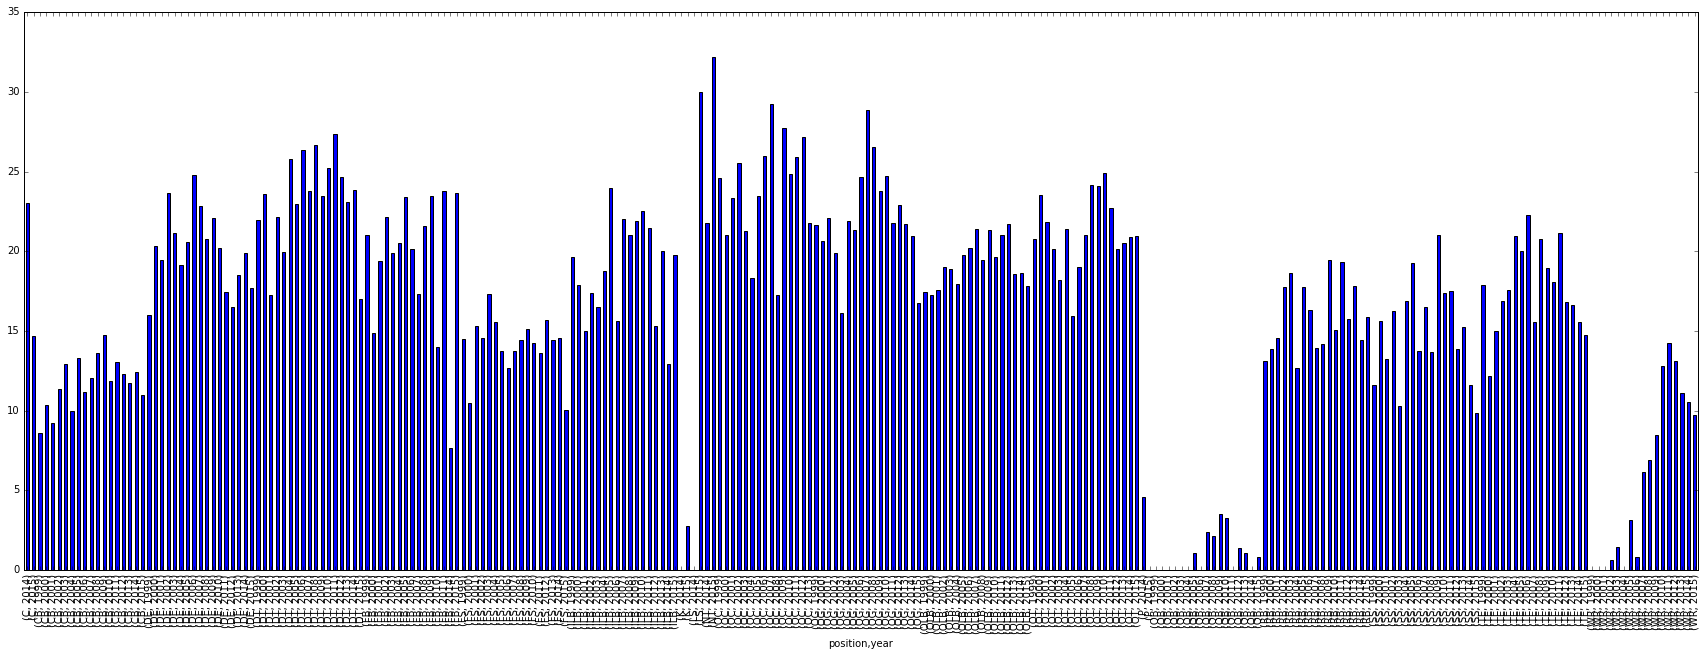

In [59]:
#want to get the mean and standard deviation per position for each year
yearposmean = df.groupby([df['position'],df['year']]).mean()
yearposstd = df.groupby([df['position'],df['year']]).std()
stdevyear = yearposstd['bench'].unstack()
meanyear = yearposmean['bench'].unstack()
yearposmean['bench'].plot.bar(figsize=(30,10),yerr = stdevyear)
meanyear

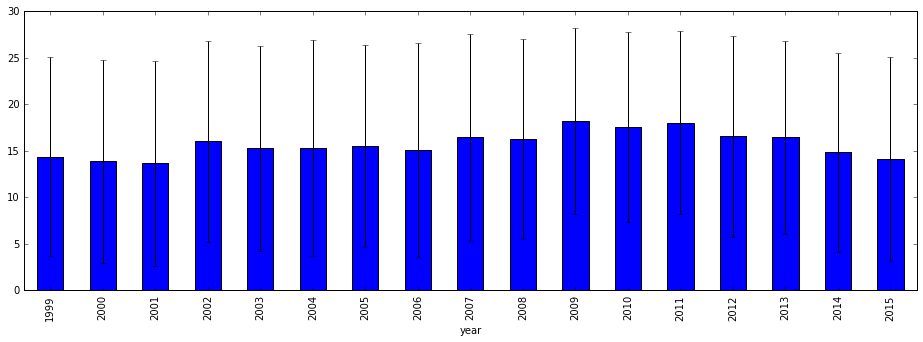

In [60]:
#above is messy so want to clean it up, maybe just get year on year first
yeartotmean = df.groupby([df['year']]).mean()
yeartotstdev = df.groupby(df['year']).std()
yeartotmean.unstack()
yeartotstdev.unstack()
yeartotmean['bench'].plot.bar(figsize=(16,5),yerr=yeartotstdev)


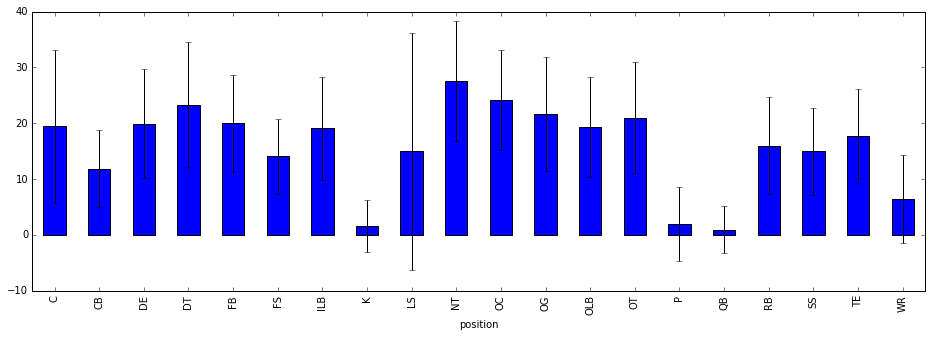

In [64]:
#the problem above is obviously that the standard deviation varies wildly because of different position groups. 
#A WR isn't going to be able to lift as much as an OG or C, so keeping some sort of positional filter active is probably a good idea
#Let's do the same here as we did above, but group on position to get another axis view
postotmean = df.groupby([df['position']]).mean()
postotstdev = df.groupby(df['position']).std()
postotmean.unstack()
postotstdev.unstack()
postotmean['bench'].plot.bar(figsize=(16,5),yerr=postotstdev['bench'])

In [77]:
#Looking at K, LS, P, QB and WR, there is a negative standard deviation limit. Just want to investigate that real quick:
postotstdev['bench'],postotmean['bench'] 


(position
 C      13.746168
 CB      6.885289
 DE      9.810283
 DT     11.184099
 FB      8.706433
 FS      6.740537
 ILB     9.225891
 K       4.666667
 LS     21.213203
 NT     10.748385
 OC      8.953536
 OG     10.254408
 OLB     8.924451
 OT      9.975291
 P       6.639528
 QB      4.192382
 RB      8.701358
 SS      7.849981
 TE      8.423282
 WR      7.895793
 Name: bench, dtype: float64, position
 C      19.428571
 CB     11.851020
 DE     19.915663
 DT     23.348649
 FB     20.000000
 FS     14.056872
 ILB    19.088889
 K       1.555556
 LS     15.000000
 NT     27.555556
 OC     24.098485
 OG     21.700000
 OLB    19.337912
 OT     21.000000
 P       1.916667
 QB      0.930921
 RB     16.004396
 SS     14.972826
 TE     17.673540
 WR      6.366086
 Name: bench, dtype: float64)

In [137]:
#A problem with our stdev is that 0 values for a bench press across multiple years result in a very low mean (0.9) whereas the stdev is 4
#So this kinda makes sense, but it's not desirable. We should probably filter out 0 values. Here's the code slightly altered:
postotmean = df.groupby([df['position'],df['year']])
filteredbench = postotmean.apply(lambda x:x[x['bench']>0.0])
filteredbench['bench']

year                  name  firstname       lastname  \
position year                                                              
C        2014 344   2014        Russell Bodine    Russell         Bodine   
              443   2014    Jonotthan Harrison  Jonotthan       Harrison   
              462   2014            Gabe Ikard       Gabe          Ikard   
              491   2014          Tyler Larsen      Tyler         Larsen   
              502   2014         Corey Linsley      Corey        Linsley   
              518   2014         Marcus Martin     Marcus         Martin   
              553   2014       Matthew Paradis    Matthew        Paradis   
              577   2014       Weston Richburg     Weston       Richburg   
              609   2014           James Stone      James          Stone   
              615   2014        Travis Swanson     Travis        Swanson   
         2015 85    2015        Reese Dismukes      Reese       Dismukes   
              98    2015        Cameron Erving    Cameron         Erving   
              104   2015           B.J. Finney       B.J.         Finney   
              113   2015           Andy Gallik       Andy         Gallik   
              201   2015            Ali Marpet        Ali         Marpet   
CB       1999 4636  1999           Jason Craft      Jason          Craft   
              4638  1999        Chris Cummings      Chris       Cummings   
              4660  1999          Eric Edwards       Eric        Edwards   
              4671  1999        Charles Fisher    Charles         Fisher   
              4710  1999         Andre Holland      Andre        Holland   
              4745  1999        Jermaine Jones   Jermaine          Jones   
              4778  1999       Deshone Mallard    Deshone        Mallard   
              4784  1999     Daylon McCutcheon     Daylon     McCutcheon   
              4802  1999          Paul Miranda       Paul        Miranda   
              4803  1999       Donald Mitchell     Donald       Mitchell   
              4810  1999         Dee Moronkola        Dee      Moronkola   
              4814  1999        Gerald Neasman     Gerald        Neasman   
              4828  1999        Anthony Parker    Anthony         Parker   
              4898  1999             Ty Talton         Ty         Talton   
              4913  1999           Fred Vinson       Fred         Vinson   
...                  ...                   ...        ...            ...   
WR       2015 1     2015        Nelson Agholor     Nelson        Agholor   
              4     2015          Mario Alford      Mario         Alford   
              7     2015         Dres Anderson       Dres       Anderson   
              18    2015            Kenny Bell      Kenny           Bell   
              30    2015          Da'Ron Brown     Da'Ron          Brown   
              48    2015           Kaelin Clay     Kaelin           Clay   
              51    2015         Sammie Coates     Sammie         Coates   
              59    2015          Chris Conley      Chris         Conley   
              67    2015       Jamison Crowder    Jamison        Crowder   
              69    2015       Davaris Daniels    Davaris        Daniels   
              73    2015         Devante Davis    Devante          Davis   
              74    2015          Geremy Davis     Geremy          Davis   
              87    2015       Phillip Dorsett    Phillip        Dorsett   
              111   2015        Devin Funchess      Devin       Funchess   
              128   2015  Dorial Green-Beckham     Dorial  Green-Beckham   
              137   2015          Rannell Hall    Rannell           Hall   
              141   2015          Justin Hardy     Justin          Hardy   
              143   2015           Josh Harper       Josh         Harper   
              176   2015       Christion Jones  Christion          Jones   
              186   2015          Dezmin Lewis     Dezmin          L

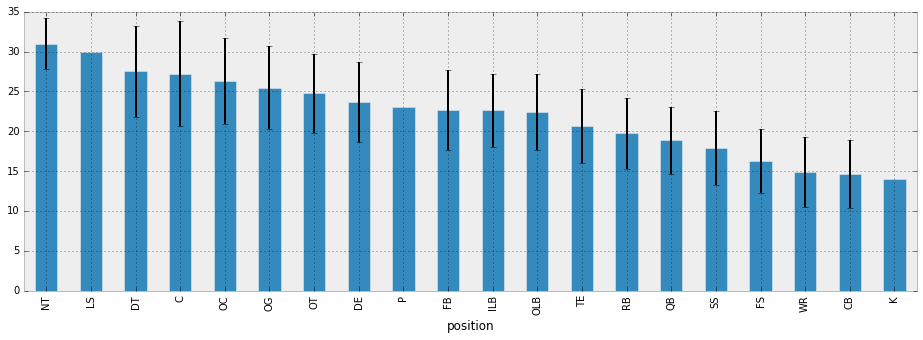

In [165]:
#Now we have each position, with a year grouping, the bench filtered to exclude 0s. Let's see the mean progression year by year with the standard deviation included.
filteredbenchmean = filteredbench.groupby([filteredbench['position']]).mean()
filteredbenchstdev = filteredbench.groupby([filteredbench['position']]).std()
filteredbenchmeansorted = filteredbenchmean.sort_values(by=['bench'], ascending=False,axis=0)
p.style.use('bmh')
filteredbenchmeansorted['bench'].plot.bar(figsize=(16,5),yerr=filteredbenchstdev)

In [168]:
#Interesting, but probably not super revealing. We all know a Nose Tackle would easily out bench press a QB or WR. Now we've to go find a similar data set but by year and by a single position
#Thankfully the process we just followed should prepare us for the work needed.
#Unfortunately, filtering to exclude positions AND 0s is very taxing, but thankfully we know that in an NFL combine, players dont HAVE to bench press, so very likely the 0s are actually non participants, so replacing them with NaN actually makes more sense, so the mean doesn't take them into consideration. 
#df = df.replace(0, np.NaN)
benchreplace = rbfilter.replace(0,np.NaN)
benchreplace.head()

year              name firstname  lastname position  \
position year                                                             
RB       1999 4574  1999      Jerry Azumah     Jerry    Azumah       RB   
              4580  1999     Marlon Barnes    Marlon    Barnes       RB   
              4582  1999  Michael Basnight   Michael  Basnight       RB   
              4592  1999    Ronnie Bradley    Ronnie   Bradley       RB   
              4617  1999        Mike Cloud      Mike     Cloud       RB   

                    heightfeet  heightinches  heightinchestotal  weight  arms  \
position year                                                                   
RB       1999 4574           5          10.0               70.0     195   NaN   
              4580           5          10.0               70.0     211   NaN   
              4582           6           1.0               73.0     241   NaN   
              4592           5           9.0               69.0     221   NaN   
              4617           5          11.0               71.0     200   NaN   

                      ...     vertical  broad  bench  round         college  \
position year         ...                                                     
RB       1999 4574    ...         43.5  132.0   15.0    5.0   New Hampshire   
              4580    ...         35.5  120.0   18.0    NaN             NaN   
              4582    ...         34.5  118.0   18.0    NaN             NaN   
              4592    ...         36.0  115.0    NaN    NaN             NaN   
              4617    ...         38.5  117.0   17.0    2.0  Boston College   

                       pick  pickround  picktotal  wonderlic  nflgrade  
position year                                                           
RB       1999 4574  14(147)       14.0      147.0        NaN       NaN  
              4580      NaN        NaN        NaN        NaN       NaN  
              4582      NaN        NaN        NaN        NaN       NaN  
              4592      NaN        NaN        NaN        NaN       NaN  
              4617   23(54)       23.0       54.0        NaN       NaN  

[5 rows x 26 columns]

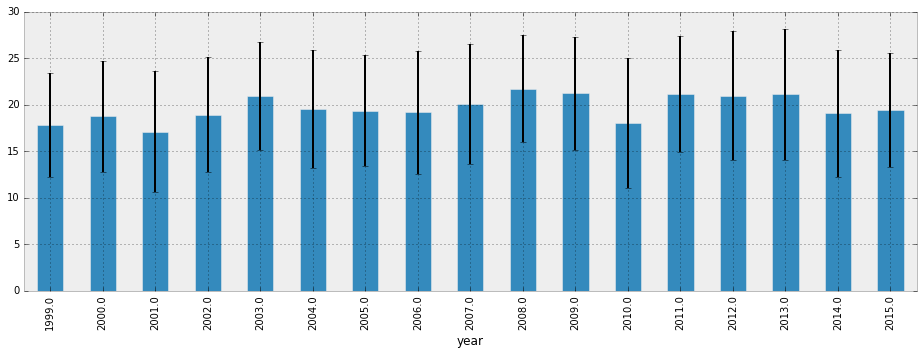

In [225]:
#That was pretty easy. Now we have some good data to do some playing with. 
#Remember, we want the Y axis of our chart to display the year, and for it NOT to be sorted by the best / highest bench, but rather a year on year progression of how RBs performed.
benchreplacemean = benchreplace.groupby([filteredbench['year']]).mean()
benchreplacestdev = filteredbench.groupby([filteredbench['year']]).std()
benchreplacesorted = benchreplacemean.sort_values(by=['year'], ascending=True,axis=0)
p.style.use('bmh')
benchreplacesorted['bench'].plot.bar(figsize=(16,5),yerr=benchreplacestdev)


In [226]:
#Why not go a little further? We can probably overlay a level of what the mean bench was over this timespan and see whether certain years surpassed it or fell short
#First step is getting what the mean is over the years in the dataset
rbtotalmean = benchreplace['bench'].mean()
rbtotalmean

19.734417344173441

In [229]:
#One of the problems here is that the mean of all RB bench press results over the 16 years is not part of the Dataframe, so we can sneakily just insert it
benchreplacesorted.insert(3,'benchmean',rbtotalmean,True)

In [247]:
#And check how it looks
benchreplacesorted

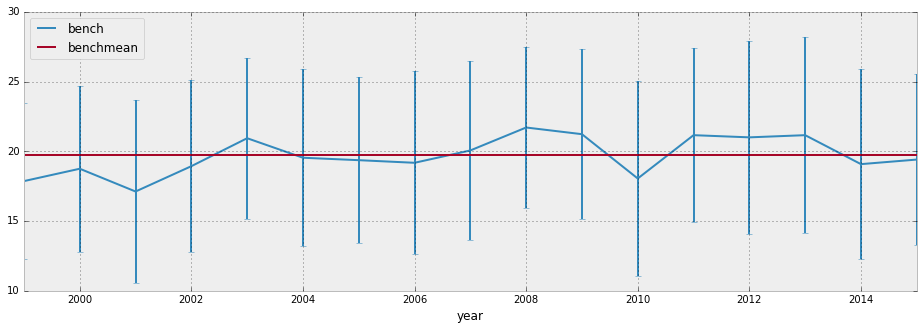

In [246]:
#And now just call the two values across the series, using a line because the bar makes it a little ugly.
fig = p.figure()
benchreplacesorted[['bench','benchmean']].plot.line(figsize=(16,5),yerr=benchreplacestdev)

In [ ]:
#The standard deviation being so consistent is pretty neat, however I was hoping to see some sort of trend in modern players' stats. 
#Perhaps strength isn't the best indicator of the progression of modern day athletes, they've probably always been this strong.
#Maybe speed and agility are more illuminating indicators of the NFL's change in team structures both offensively and defensively. For another day though...